In [572]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# 1.0

In [573]:
SampleSet = range(3)
SubSeq = np.array([2,0,1])
n = 10000
z = np.random.choice(SampleSet,n)

In [574]:
start = time.time()
cnt = 0
for i in range(n-2):
    if z[i]==2 and z[i+1]==0 and z[i+2]==1:
        cnt=cnt+1
end= time.time()
print('runtime: ' ,end-start)
print('number of apparences of (2,0,1): ',cnt)

runtime:  0.006996631622314453
number of apparences of (2,0,1):  378


In [575]:
start = time.time()
Shift1=np.roll(z,n-1)
Shift2=np.roll(z,n-2)
Shift1[n-1],Shift2[n-1],Shift2[n-2]=-99999,-99999,-99999
ans=np.logical_and(Shift2==1,np.logical_and(z==2,Shift1==0))
end= time.time()
print('runtime: ' ,end-start)
print('number of apparences of (2,0,1): ',cnt)

runtime:  0.0009992122650146484
number of apparences of (2,0,1):  378


# 1.1a

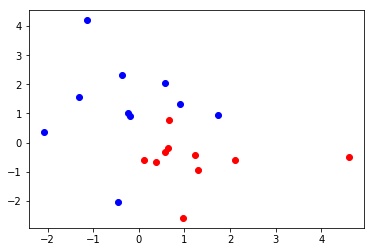

In [576]:
SampleSize = 10
meana=np.array([1.5, 0])
meanb= np.array([0,1.5])
var=np.eye(2,2)
a= np.random.multivariate_normal(meana, var, SampleSize)
b= np.random.multivariate_normal(meanb, var, SampleSize)
plt.plot(a[:,0],a[:,1],'ro')
plt.plot(b[:,0],b[:,1],'bo')
plt.show()

# 1.1b

(100, 2)
(100, 3)


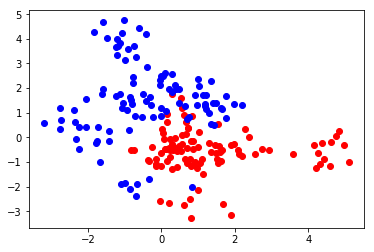

In [609]:
SampleSet = range(10)
n = 100
Indx = np.random.choice(SampleSet,2*n)
eps1=np.random.multivariate_normal([0,0], 1/4*np.eye(2,2), n)
eps2=np.random.multivariate_normal([0,0], 1/4*np.eye(2,2), n)
x1= a[Indx[0:n]]+eps1
x2= b[Indx[n:2*n]]+eps2
print(x1.shape)

x1=np.insert(x1,2,1,axis=1)

print(x1.shape)
x2= np.insert(x2,2,0,axis=1)

Data1 = np.concatenate((x1,x2))
plt.plot(Data1[0:n,0],Data1[0:n,1],'ro',Data1[n:2*n,0],Data1[n:2*n,1],'bo')
plt.show()

# 1.2

In [610]:
# Solve LLS
# returns coefficients for classifiying line a_0x_0 + ... + a_(d-1)x_(d-1) + a_d = 0.5
def LLS(X): #X a (n,d) numpy array with d-1 dependent variables and 1 independent variable
    n = X.shape[0]
    d = X.shape[1]
    X = np.insert(X,d-1,1,axis=1) # add column of 1s for constant term
    x = X[:,0:d] # dependent variable
    y = X[:,d] # independent variable
    y=y.reshape(n,1)
    c=x.T@x
    return(np.linalg.solve(c,x.T@y)) 

In [611]:
# Gives a scatter plot of labeled data with Sperating Hyperplane
# Input should be a (n,3) matrix with the first 2 columns the dependent variables and the last column the dependent variable (should be 0s and 1s)
def conplot(X):
    alpha=LLS(X)
    maxx = np.amax(X[:,0])
    maxy = np.amax(X[:,1])
    minx = np.amin(X[:,0])
    miny = np.amin(X[:,1])
    t = np.arange(minx-1, maxx+1, 0.1)
    s = np.arange(miny-1, maxy+1, 0.1)
    p,q = np.meshgrid(t, s, sparse=True)
    z = alpha[1,0]*q+alpha[0,0]*p + alpha[2,0]
    h = plt.contourf(t,s,z,[-99999,0.5,99999], colors=['blue','red'],alpha=0.5)
    plt.plot(X[X[:,2]==1][:,0],X[X[:,2]==1][:,1],'ro',X[X[:,2]==0][:,0],X[X[:,2]==0][:,1],'bo')

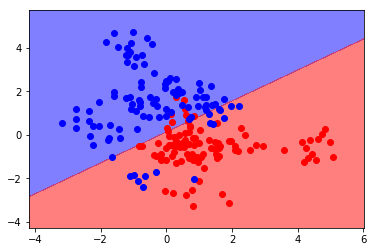

In [612]:
conplot(Data1)
plt.show()

# 1.3

In [605]:
# Confusion Matrix
#Prints out the Confusion Matrix and the Accuracy and returns the Confusion Matrix
def confusion(X,alpha):
    n=X.shape[0]
    d=X.shape[1]-1
    Xevaled = X[:,0:d].dot(alpha[0:d,0])+alpha[d,0]
    C10=np.sum(np.logical_and([Xevaled>0.5],X[:,d]==0))
    C00=np.sum(np.logical_and([Xevaled<0.5],X[:,d]==0))
    C01=np.sum(np.logical_and([Xevaled<0.5],X[:,d]==1))
    C11=np.sum(np.logical_and([Xevaled>0.5],X[:,d]==1))
    C=[[C00,C01],[C10,C11]]
    print("Confusion matrix: ", C)
    print("accuracy: " , np.trace(C)/n)
    return(C)

In [626]:
confusion(Data1,alpha)

Confusion matrix:  [[85, 12], [15, 88]]
accuracy:  0.865


[[85, 12], [15, 88]]

# 1.4

In [614]:


n = 100000 # number of samples

#Create Random Data around sample from 1.1
SampleSet = range(SampleSize)
Indx = np.random.choice(SampleSet,2*n)
eps1=np.random.multivariate_normal([0,0], 1/4*np.eye(2,2), n)
eps2=np.random.multivariate_normal([0,0], 1/4*np.eye(2,2), n)
x1= a[Indx[0:n]]+eps1
x2= b[Indx[n:2*n]]+eps2

#label Data
x1= np.insert(x1,2,1,axis=1)
x2= np.insert(x2,2,0,axis=1)
Data2 = np.concatenate((x1,x2))

alpha = LLS(Data2)

C=confusion(Data2,alpha)

Confusion matrix:  [[80456, 12750], [19544, 87250]]
accuracy:  0.83853


# 1.5

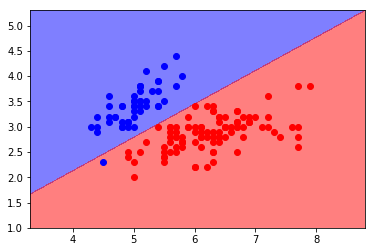

Confusion matrix:  [[50, 0], [0, 100]]
accuracy:  1.0


[[50, 0], [0, 100]]

In [639]:
#load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
irisDataFrame1 = pd.read_csv(url , header=None)

#label Data (versicolor , virginica = 1, setosa = 0)
irisDataFrame1['label'] = irisDataFrame1.iloc[:,4].isin(['Iris-versicolor','Iris-virginica']).astype(int)

# plot based on 1st 2 attributes
IrisArray1 = np.array(irisDataFrame1.loc[:,[0,1,'label']])
conplot(IrisArray1)
plt.show(h)

# accuracy based on all attributes
IrisArray2 = np.array(irisDataFrame1.loc[:,[0,1,2,3,'label']])
confusion(IrisArray2,LLS(IrisArray2))



Confusion matrix:  [[21, 12], [29, 88]]
accuracy:  0.726666666667


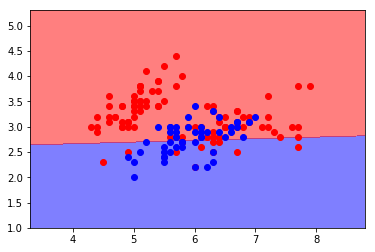

Confusion matrix:  [[24, 14], [26, 86]]
accuracy:  0.733333333333


[[24, 14], [26, 86]]

In [644]:
#load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
irisDataFrame2 = pd.read_csv(url , header=None)

#label Data (setosa , virginica = 1, versicolor = 0)
irisDataFrame2['label'] = irisDataFrame2.iloc[:,4].isin(['Iris-setosa','Iris-virginica']).astype(int)

# plot based on 1st 2 attributes
IrisArray1 = np.array(irisDataFrame2.loc[:,[0,1,'label']])
conplot(IrisArray1)
confusion(IrisArray1,LLS(IrisArray1))
plt.show()

# accuracy based on all attributes
IrisArray2 = np.array(irisDataFrame2.loc[:,[0,1,2,3,'label']])
confusion(IrisArray2,LLS(IrisArray2))

In [709]:
def LLSGrad(X):
    n = X.shape[0]
    d = X.shape[1]
    X = np.insert(X,d-1,1,axis=1) # add column of 1s for constant term
    x = X[:,0:d] # dependent variable
    y = X[:,d].reshape(n,1) # independent variable
    
    maxSteps=100
    nu = 0.1
    
    a= np.random.rand(d).reshape(d,1)
    step = 0
    grad=(2/n)*np.sum((x.dot(a)-y)*x,axis=0).reshape(d,1)
    while (np.abs(np.sum(J))>0.1 ) and (step < maxSteps):
        grad=(2/n)*np.sum((x.dot(a)-y)*x,axis=0).reshape(d,1)
        a = a - nu * grad
        step = step + 1
    return(a)

print(LLS(Data1)-LLSGrad(Data1))

[[ -3.30602230e-09]
 [ -3.22213606e-09]
 [  1.02621387e-08]]
